In [197]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.options.mode.chained_assignment = None

In [198]:
#koneksi ke database
conn = sqlite3.connect("D:\Pacmann\Data Wrangling\olist.db")

In [199]:
#menggabungkan data dan menyimpan
order_by_time = pd.read_sql("SELECT * FROM olist_order_items_dataset join olist_order_dataset using(order_id)", conn)
payment_type = pd.read_sql("SELECT * FROM olist_order_items_dataset join olist_order_payments_dataset using(order_id)", conn)
cust_by_city = pd.read_sql("SELECT * FROM olist_order_dataset join olist_order_customer_dataset using(customer_id)", conn)
order_by_time, cust_by_city, payment_type

(         index                          order_id  order_item_id  \
 0            0  00010242fe8c5a6d1ba2dd792cb16214              1   
 1            1  00018f77f2f0320c557190d7a144bdd3              1   
 2            2  000229ec398224ef6ca0657da4fc703e              1   
 3            3  00024acbcdf0a6daa1e931b038114c75              1   
 4            4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
 ...        ...                               ...            ...   
 112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
 112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
 112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
 112648  112648  fffe18544ffabc95dfada21779c9644f              1   
 112649  112649  fffe41c64501cc87c801fd61db3f6244              1   
 
                               product_id                         seller_id  \
 0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
 1       e5f2d52b802189e

In [200]:
#Pengecekan nan

list1 = [order_by_time, cust_by_city, payment_type]
for i in list1:
    print(i.isnull().sum())

index                               0
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
index                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64
index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
index                               0

In [201]:
#mengecek nan dalam presentase dan mengurutkannya

for i in list1:
    print(i.isnull().sum().sort_values(ascending=False)/len(i)*100)

order_delivered_customer_date    2.178429
order_delivered_carrier_date     1.059920
order_approved_at                0.013316
index                            0.000000
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
index                            0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64
order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
index                            0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_time

In [202]:
#mendrop yang memiliki nan

cust_by_city = cust_by_city.drop(['order_delivered_customer_date',
                                   'order_delivered_carrier_date',
                                   'order_approved_at'], axis=1)
order_by_time = order_by_time.drop(['order_delivered_customer_date',
                                   'order_delivered_carrier_date',
                                   'order_approved_at'], axis=1)

In [203]:
#update list tanpa nan

update_list1 = [order_by_time, cust_by_city, payment_type]
for i in update_list1:
    print(i.isnull().sum().sort_values(ascending=False)/len(i)*100)

index                            0.0
order_id                         0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
index                            0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_estimated_delivery_date    0.0
dtype: float64
index                            0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_estimated_delivery_date    0.0
index                            0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
dtype: float64
index                   0.0
order_id                0.0
order_item_id           0.

In [204]:
#Pengecekan outlier

for i in list1:
    print(i.describe())

               index  order_item_id          price  freight_value  \
count  112650.000000  112650.000000  112650.000000  112650.000000   
mean    56324.500000       1.197834     120.653739      19.990320   
std     32519.398249       0.705124     183.633928      15.806405   
min         0.000000       1.000000       0.850000       0.000000   
25%     28162.250000       1.000000      39.900000      13.080000   
50%     56324.500000       1.000000      74.990000      16.260000   
75%     84486.750000       1.000000     134.900000      21.150000   
max    112649.000000      21.000000    6735.000000     409.680000   

               index  
count  112650.000000  
mean    49775.306072  
std     28719.629766  
min         0.000000  
25%     24886.250000  
50%     49773.500000  
75%     74648.750000  
max     99440.000000  
              index         index  customer_zip_code_prefix
count  99441.000000  99441.000000              99441.000000
mean   49720.000000  49720.000000              3513

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

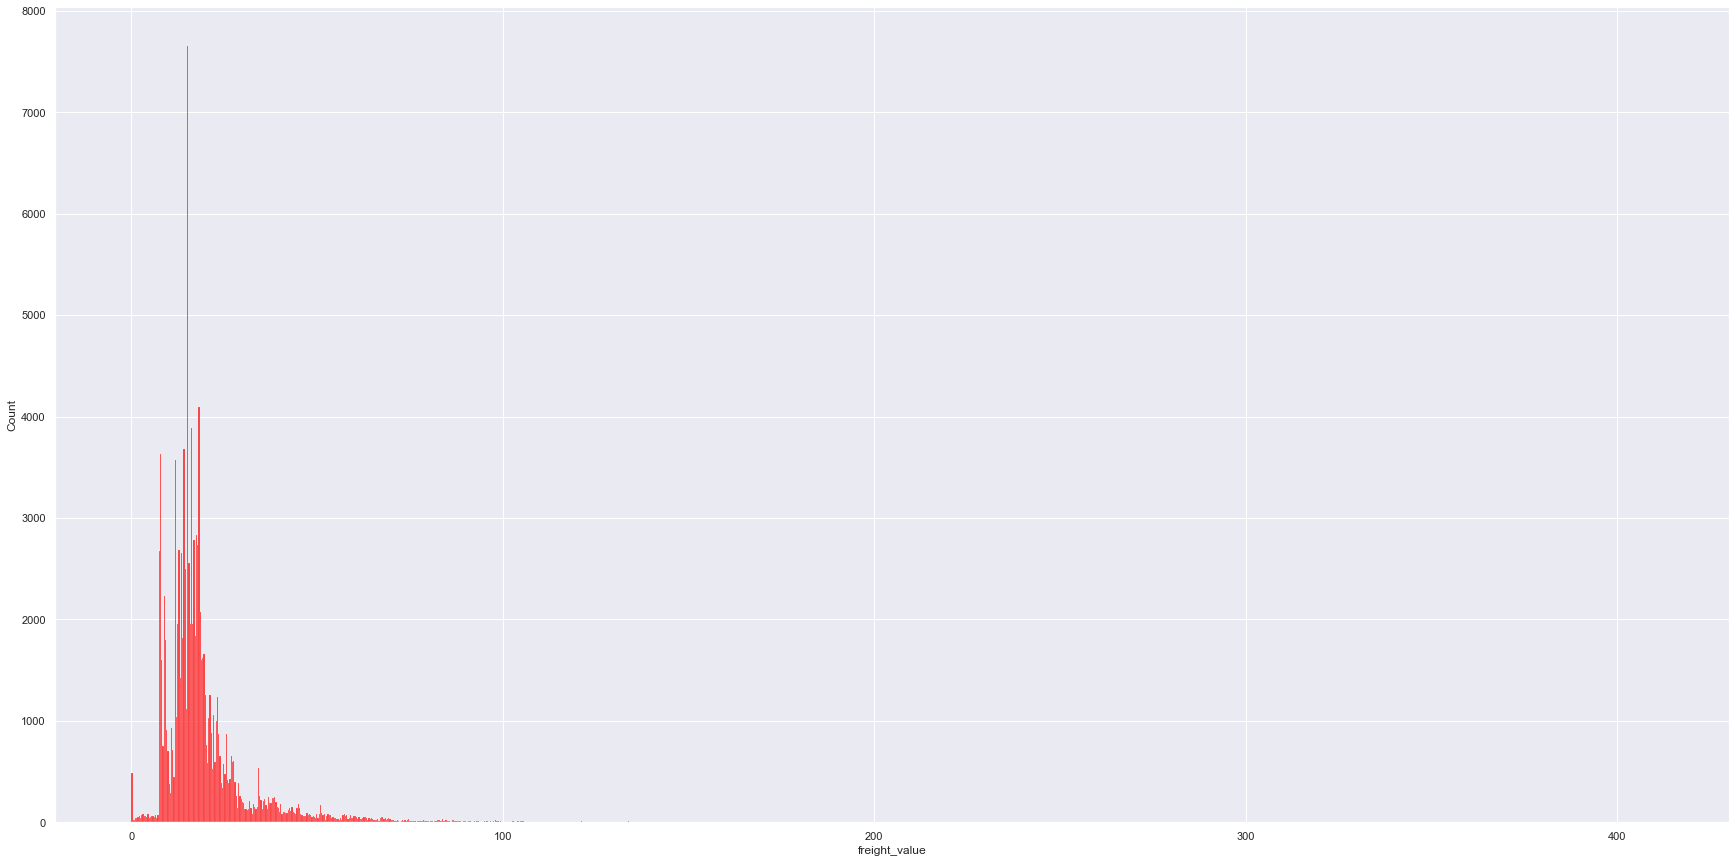

In [205]:
#visualisasi outlier

sns.histplot(data=order_by_time, x="freight_value", color="red")

<AxesSubplot:xlabel='price', ylabel='Count'>

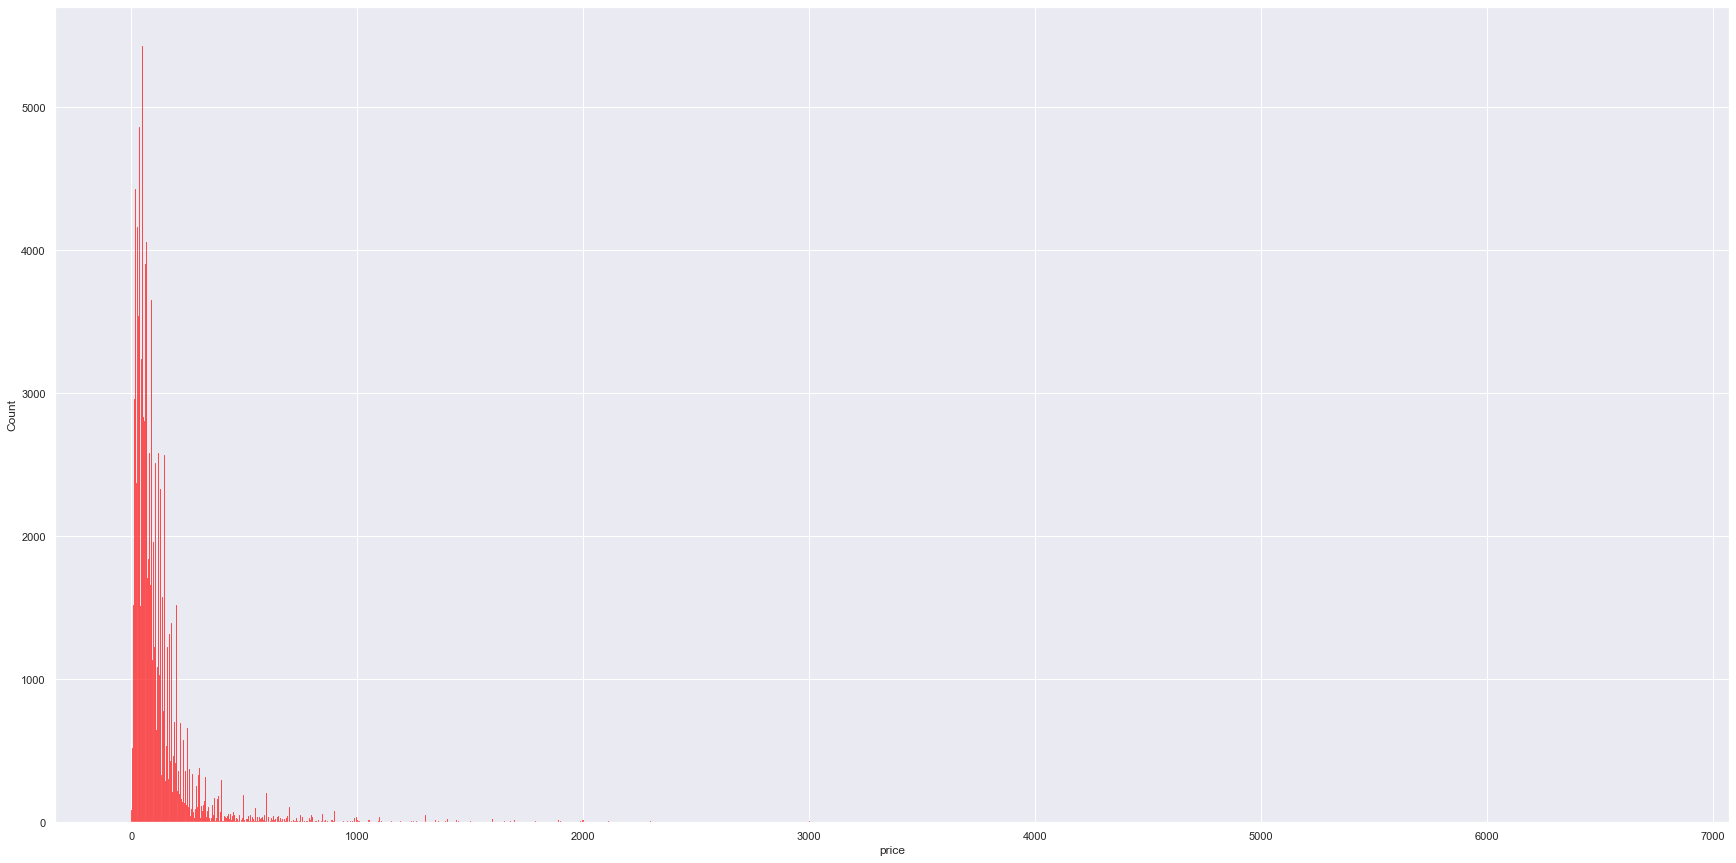

In [206]:
sns.histplot(data=order_by_time, x="price", color="red")

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

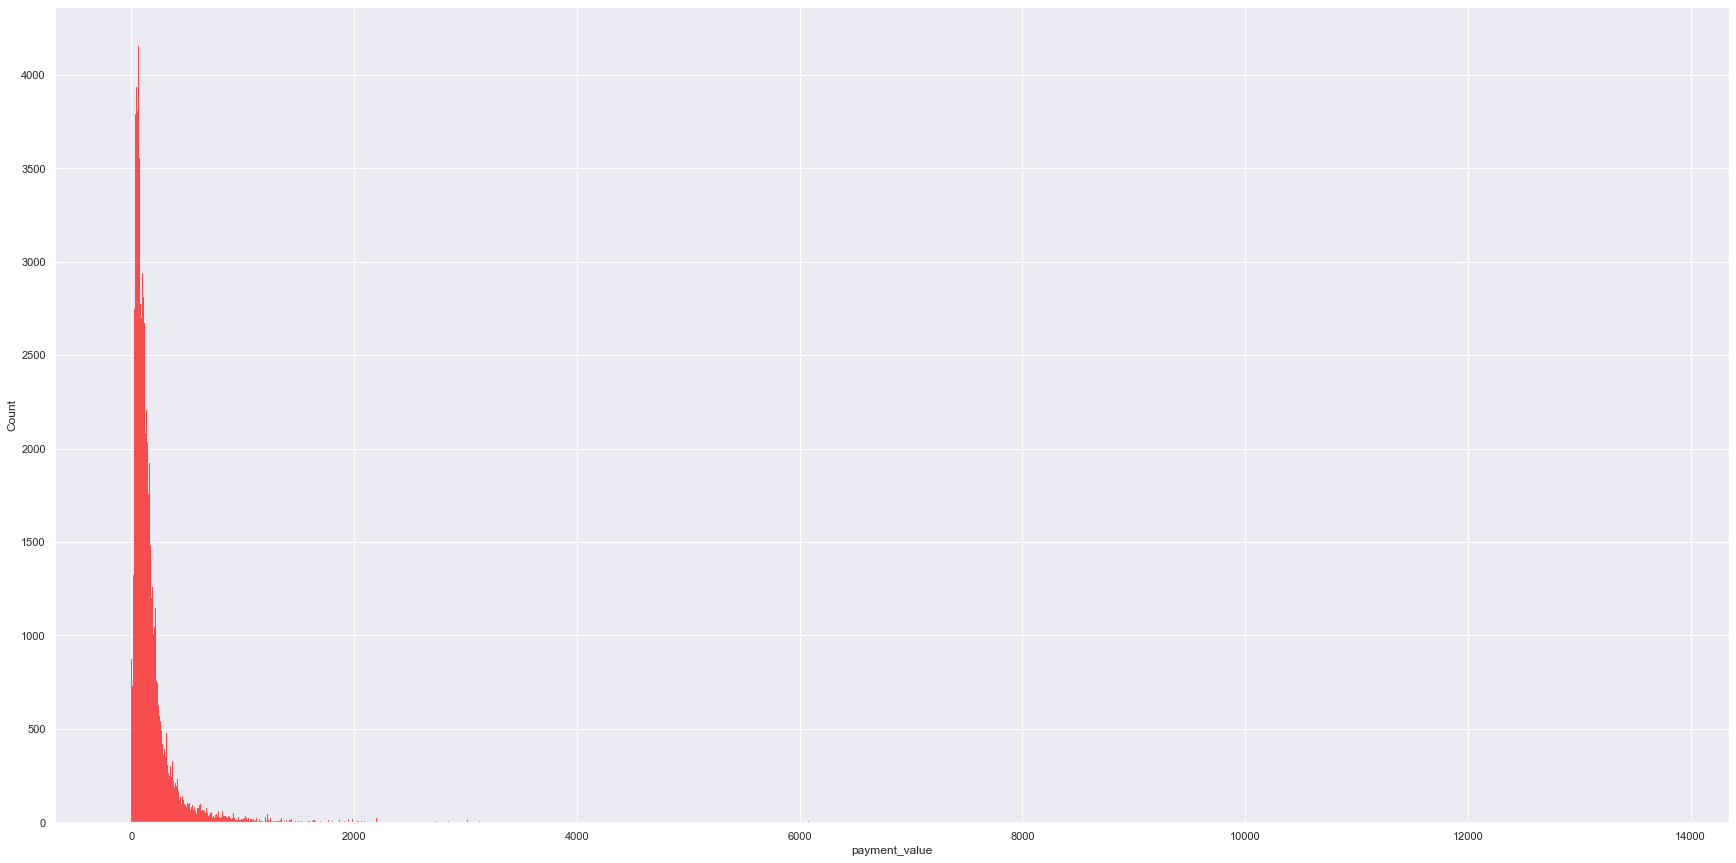

In [207]:
sns.histplot(data=payment_type, x="payment_value", color="red")

In [208]:
#mencari q1, q3, IQR, dan mengatur batas 

q3_price = order_by_time["price"].quantile(0.75)
q3_freight_value = order_by_time["freight_value"].quantile(0.75)
q3_payment_value = payment_type["payment_value"].quantile(0.75)
q1_price = order_by_time["price"].quantile(0.25)
q1_freight_value = order_by_time["freight_value"].quantile(0.25)
q1_payment_value = payment_type["payment_value"].quantile(0.25)

IQR_price = q3_price - q1_price
IQR_freight = q3_freight_value - q1_freight_value
IQR_payment = q3_payment_value - q1_payment_value

order_by_time = order_by_time[order_by_time["price"] < (q3_price + (IQR_price*1.5))]
order_by_time = order_by_time[order_by_time["freight_value"] < (q3_freight_value + (IQR_freight*1.5))]
payment_type = payment_type[payment_type["payment_value"] < (q3_payment_value + (IQR_payment*1.5))]

<AxesSubplot:xlabel='price', ylabel='Count'>

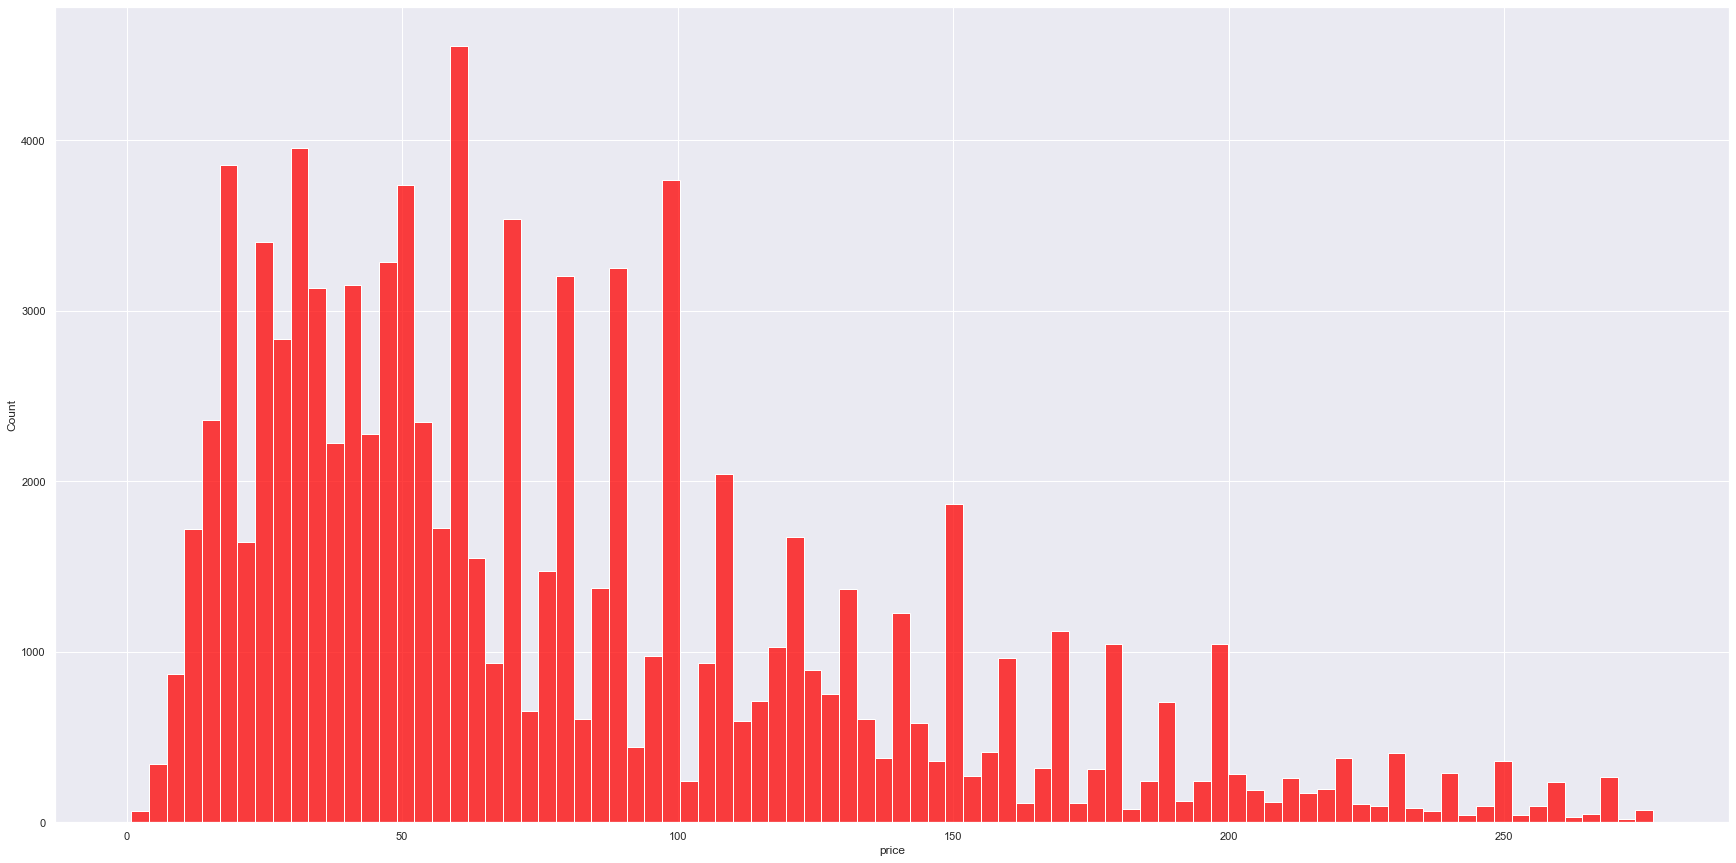

In [209]:
#menvisualisasi hasil pengecekan outlier

sns.histplot(data=order_by_time, x="price", color="red")

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

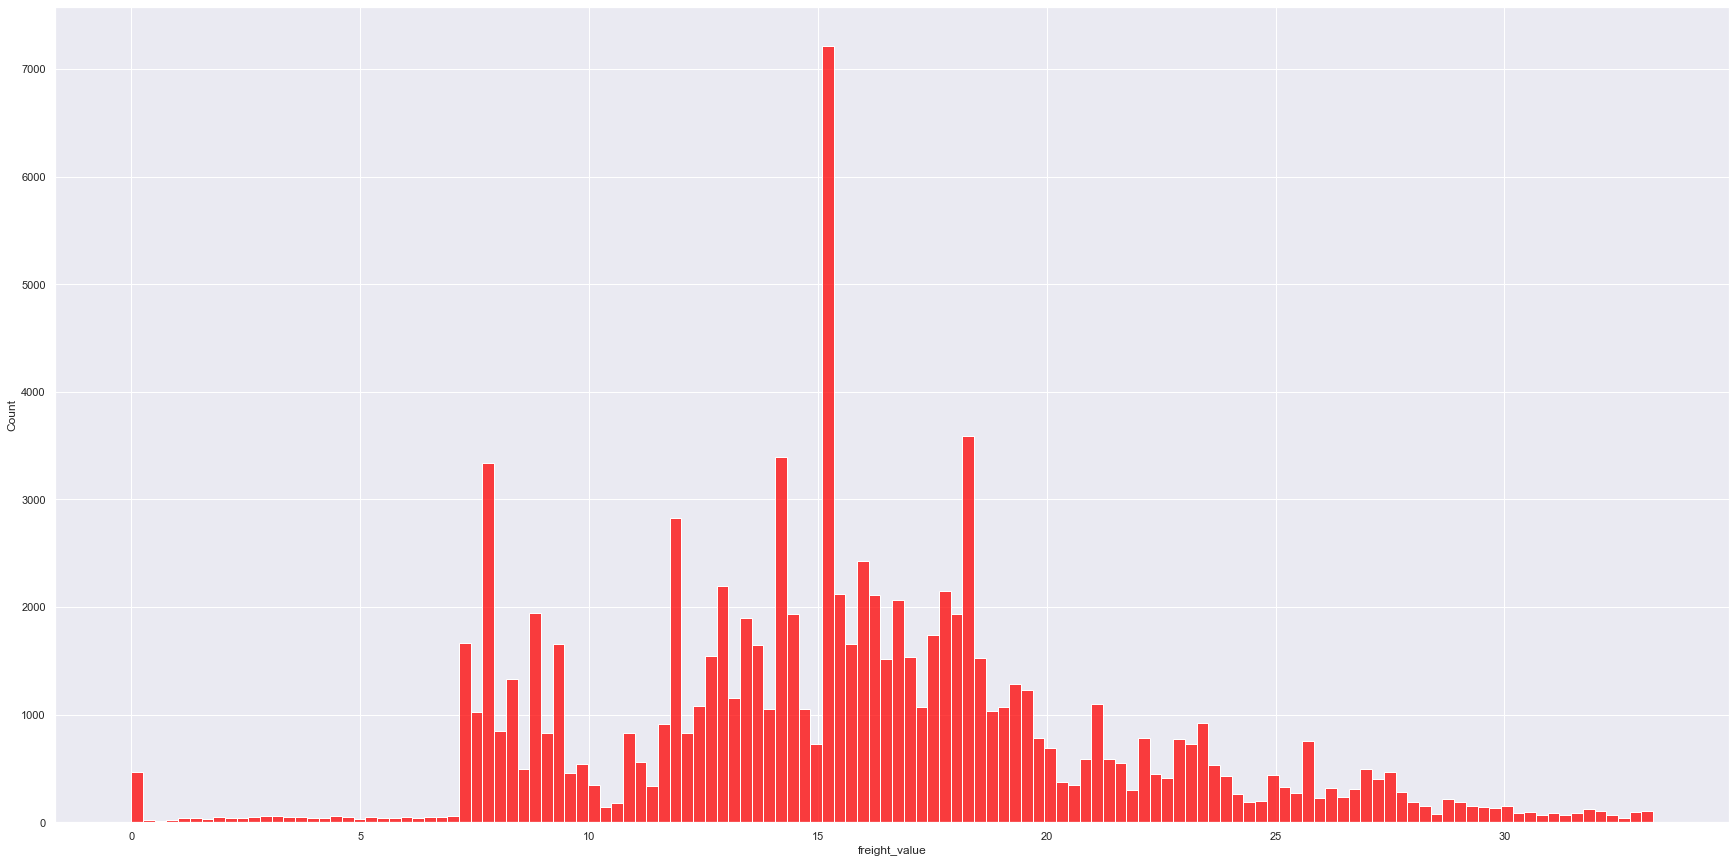

In [210]:
sns.histplot(data=order_by_time, x="freight_value", color="red")

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

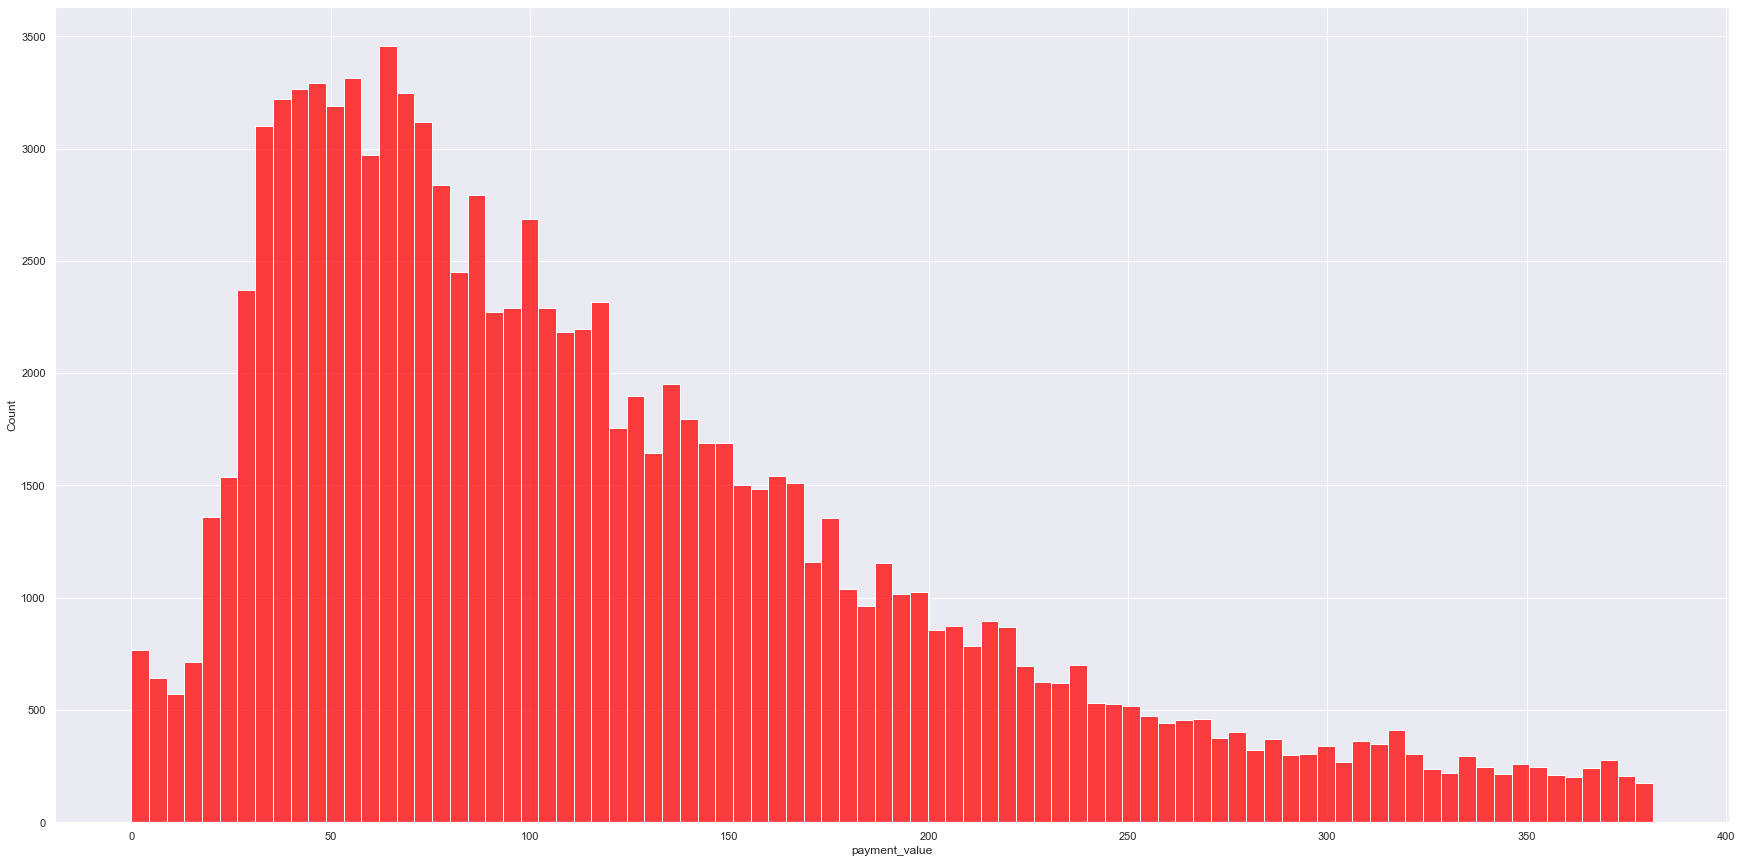

In [211]:
sns.histplot(data=payment_type, x="payment_value", color="red")

In [212]:
#Pengecekan inkonsistensi
#cek unique

order_by_time['order_status'].value_counts()

delivered      93651
shipped          974
canceled         425
invoiced         287
processing       260
unavailable        5
approved           3
Name: order_status, dtype: int64

In [213]:
cust_by_city['customer_city'].value_counts()

sao paulo           15540
rio de janeiro       6882
belo horizonte       2773
brasilia             2131
curitiba             1521
                    ...  
vila nova do sul        1
cuite velho             1
novais                  1
jacuipe                 1
nova vicosa             1
Name: customer_city, Length: 4119, dtype: int64

In [214]:
cust_by_city['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [215]:
payment_type['payment_type'].value_counts()

credit_card    79337
boleto         20963
voucher         6195
debit_card      1611
Name: payment_type, dtype: int64

In [216]:
#Pengecekan Duplicate

order_by_time[order_by_time.duplicated(keep=False)].head()
cust_by_city[cust_by_city.duplicated(keep=False)].head()
payment_type[payment_type.duplicated(keep=False)].head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,payment_sequential,payment_type,payment_installments,payment_value


In [217]:
#Date Parsing

order_by_time['Year'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.year
order_by_time['Month'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.month
order_by_time['Day'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.day
order_by_time['order_purchase_timestamp'] = pd.to_datetime(order_by_time['order_purchase_timestamp'])

In [218]:
#Grouping
#Membuat variabel Total untuk menampung sales setiap bulan dan tahun

order_by_time['Total'] = order_by_time['order_item_id']*order_by_time['price']
analisa1 = pd.DataFrame(order_by_time.groupby(['Year', 'Month'])['Total'].sum())
analisa1

Total
Year Month           
2016 9         435.23
     10      32861.78
     12         10.90
2017 1       81978.90
     2      150108.61
     3      234482.78
     4      198948.87
     5      333014.70
     6      272042.69
     7      361896.45
     8      394178.41
     9      383136.32
     10     418718.82
     11     682398.38
     12     515277.08
2018 1      673348.99
     2      629446.17
     3      624444.11
     4      639227.87
     5      648185.73
     6      519855.98
     7      519132.49
     8      549866.90
     9         145.00

In [219]:
#Pivoting
#Mengkategorikan total berdasarkan metode

payment_type['Total'] = payment_type['order_item_id']*payment_type['price']
analisa2 = payment_type.pivot_table(values = ["Total"], index='payment_type', aggfunc=[sum])
analisa2

,sum
,Total
payment_type,
boleto,1820763.21
credit_card,7819832.16
debit_card,138864.12
voucher,660755.25


In [220]:
#Mengkategorikan berdarkan state

analisa3 = cust_by_city.pivot_table(index='customer_state', values=['order_id'], aggfunc=len)
analisa3 = analisa3.sort_values(ascending=False, by='order_id')
sort_analisa3 = analisa3.sort_values(ascending=False, by='order_id').head(10)
sort_analisa3

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [221]:
#Membuat variabel Total1 untuk menampung sales setiap hari tiap bulan selama satu tahun

order_by_time['Total1'] = order_by_time['order_item_id']*order_by_time['price']
analisa4 = pd.DataFrame(order_by_time.groupby(['Month','Day'])['Total'].sum())
analisa4

Total
Month Day          
1     1     6609.87
      2    18398.30
      3    20276.82
      4    22211.03
      5    24126.30
...             ...
12    27   15983.25
      28   12273.95
      29   12479.54
      30    9301.28
      31    5656.62

[365 rows x 1 columns]

<AxesSubplot:xlabel='Month', ylabel='Total'>

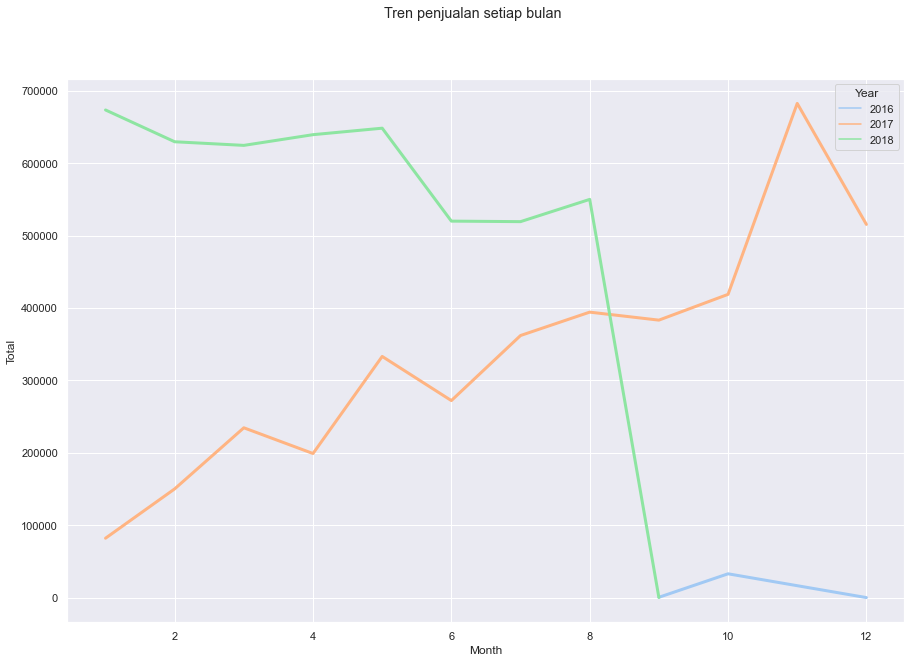

In [222]:
#VISUALISASI DARI ANALISA

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15,10)})

fig, axes = plt.subplots(1,1, sharey=False)
fig.suptitle('Tren penjualan setiap bulan')

sns.lineplot(data=analisa1, x='Month', y='Total',
             hue="Year", palette ='pastel',
             legend='full', lw=3)

array([<AxesSubplot:ylabel='(sum, Total)'>], dtype=object)

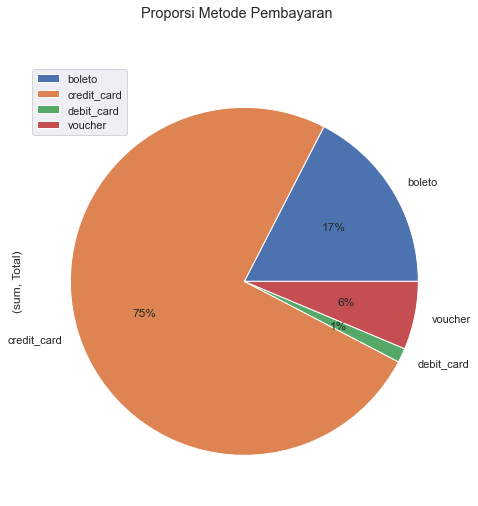

In [223]:
analisa2.plot(kind="pie", title="Proporsi Metode Pembayaran", figsize=(8,8), subplots=True, autopct="%.0f%%")

<AxesSubplot:title={'center':'Jumlah order tiap state'}, xlabel='customer_state'>

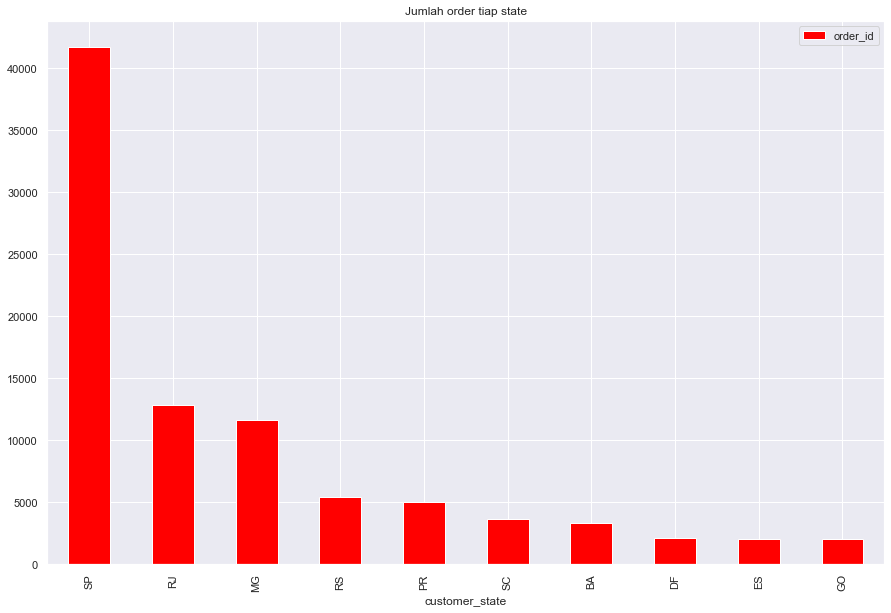

In [224]:
sort_analisa3.plot(kind='bar', title='Jumlah order tiap state', color="red")

<AxesSubplot:xlabel='Day', ylabel='Total'>

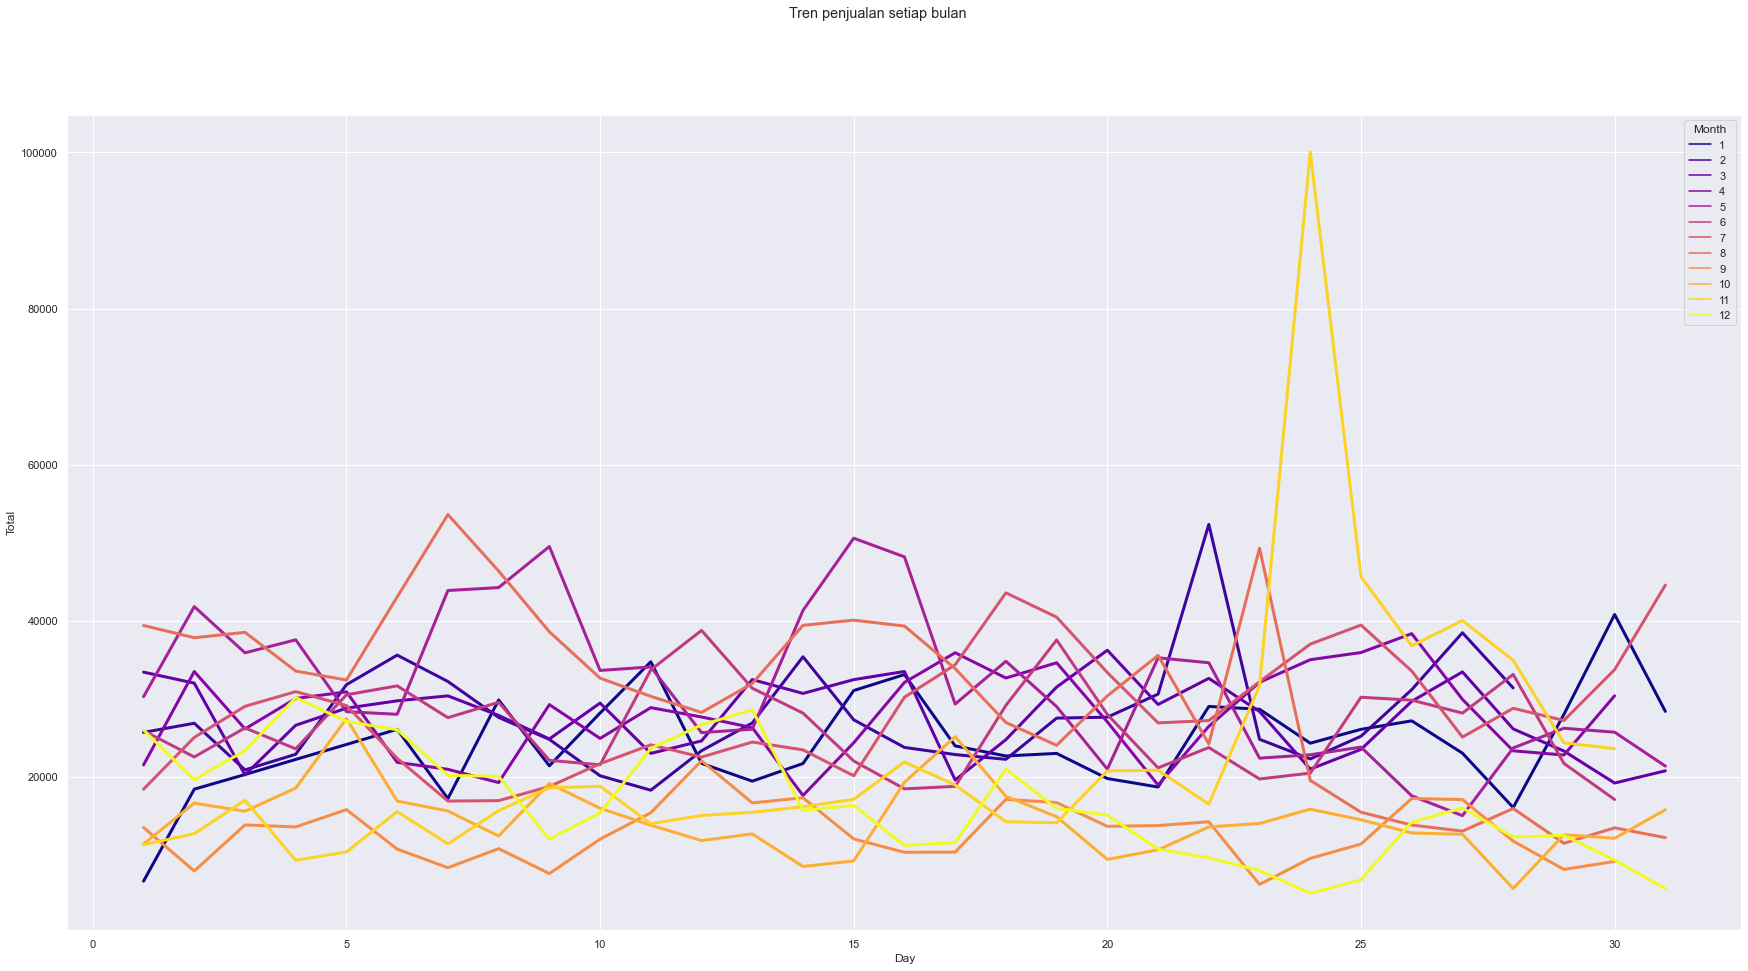

In [225]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30,15)})

fig, axes = plt.subplots(1,1, sharey=False)
fig.suptitle('Tren penjualan setiap bulan')

sns.lineplot(data=analisa4, x='Day', y='Total',
             hue="Month", palette ='plasma',
             legend='full', lw=3)